In [1]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Import Lib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Import the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv', header = 0)
training_set = dataset_train.iloc[:, 1:2].values   # make as np.array

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
trainging_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 time stops and 1 output
X_train = []
y_train = []
for i in range(60, len(trainging_set_scaled)):
    X_train.append(trainging_set_scaled[i-60:i, 0])
    y_train.append(trainging_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
# 3 diemsion test data structer to train RNN
# 1.) batchsize 2. time_step  3. [all feature in each time_step]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 

In [3]:
# Part 2 - Building The RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


In [4]:
# Part 2 - Building The RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

#Adding the 1st LSTM later and some Drop out regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

#Adding the 2nd LSTM later and some Drop out regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

#Adding the 3rd LSTM later and some Drop out regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

#Adding the 4th LSTM later and some Drop out regularisation
regressor.add(LSTM(units = 50))# return_sequences = False
regressor.add(Dropout(rate = 0.2))

#Adding Output Later
regressor.add(Dense(units = 1))

# compile the rnn
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

W0512 01:09:31.246846 19388 deprecation_wrapper.py:119] From C:\Users\natht\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0512 01:09:31.267915 19388 deprecation_wrapper.py:119] From C:\Users\natht\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0512 01:09:31.271917 19388 deprecation_wrapper.py:119] From C:\Users\natht\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0512 01:09:31.473683 19388 deprecation_wrapper.py:119] From C:\Users\natht\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0512 01:09:31.479681 19388 deprecation.py:506

In [5]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________

In [6]:
#fitting the RNN to the training set
trained  = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

W0512 01:10:32.918941 19388 deprecation_wrapper.py:119] From C:\Users\natht\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
1198/1198 [==============================] - 43s 35ms/step - loss: 0.0481
Epoch 2/100
1198/1198 [==============================] - 19s 15ms/step - loss: 0.0074
Epoch 3/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0062
Epoch 4/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0067
Epoch 5/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0047
Epoch 6/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0052
Epoch 7/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0047
Epoch 10/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0046
Epoch 11/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0045
Epoch 12/100
1198/1198 [============================

1198/1198 [==============================] - 22s 18ms/step - loss: 0.0015
Epoch 96/100
1198/1198 [==============================] - 27s 22ms/step - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0016
Epoch 98/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0015


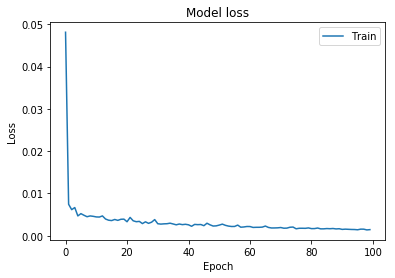

In [11]:
import matplotlib.pyplot as plt
plt.plot(trained.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [17]:
# Part 3 - Making the predictions and visualising the results

In [18]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv', header = 0)
real_stock_price = dataset_test.iloc[:, 1:2].values   # make as np.array

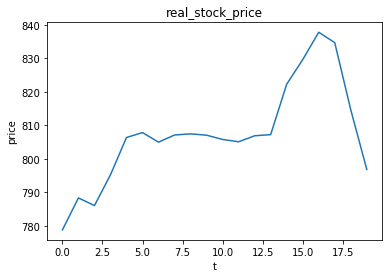

In [19]:
plt.plot(real_stock_price)
plt.title('real_stock_price')
plt.ylabel('price')
plt.xlabel('t')
plt.show()

In [86]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[(len(dataset_total) - len(dataset_test)) - 60 : ].values
inputs = inputs.reshape(-1, 1)   # inputs.reshape(80, 1)
inputs = sc.transform(inputs)   #same scaleing as training set

In [98]:
# X_test = []
# for i in range(0, 20):
#     X_test2.append(inputs[i:i+60, 0])
# X_test = np.array(X_test)

In [101]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) 

In [108]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

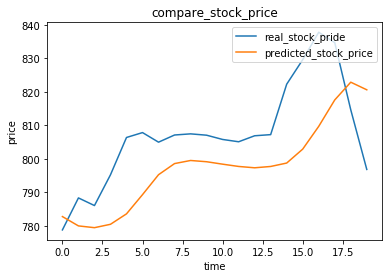

In [110]:
plt.plot(real_stock_price)
plt.plot(predicted_stock_price)
plt.title('compare_stock_price')
plt.ylabel('price')
plt.xlabel('time')
plt.legend(['real_stock_pride','predicted_stock_price'], loc='upper right')
plt.show()


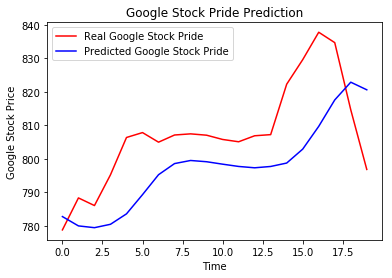

In [111]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Pride')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Pride')
plt.title('Google Stock Pride Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [112]:

import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [113]:
rmse

15.45068562787337